In [5]:
import polars as pl

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
lf = pl.scan_csv('D:/BeCode/DataSets/AIML Dataset.csv')

lf.head(10).collect()

step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
i64,str,f64,str,f64,f64,str,f64,f64,i64,i64
1,"""PAYMENT""",9839.64,"""C1231006815""",170136.0,160296.36,"""M1979787155""",0.0,0.0,0,0
1,"""PAYMENT""",1864.28,"""C1666544295""",21249.0,19384.72,"""M2044282225""",0.0,0.0,0,0
1,"""TRANSFER""",181.0,"""C1305486145""",181.0,0.0,"""C553264065""",0.0,0.0,1,0
1,"""CASH_OUT""",181.0,"""C840083671""",181.0,0.0,"""C38997010""",21182.0,0.0,1,0
1,"""PAYMENT""",11668.14,"""C2048537720""",41554.0,29885.86,"""M1230701703""",0.0,0.0,0,0
1,"""PAYMENT""",7817.71,"""C90045638""",53860.0,46042.29,"""M573487274""",0.0,0.0,0,0
1,"""PAYMENT""",7107.77,"""C154988899""",183195.0,176087.23,"""M408069119""",0.0,0.0,0,0
1,"""PAYMENT""",7861.64,"""C1912850431""",176087.23,168225.59,"""M633326333""",0.0,0.0,0,0
1,"""PAYMENT""",4024.36,"""C1265012928""",2671.0,0.0,"""M1176932104""",0.0,0.0,0,0


In [7]:
sums = lf.select('type', 'amount').group_by('type').sum().collect()
sums

type,amount
str,f64
"""CASH_OUT""",3.9441e11
"""CASH_IN""",2.3637e11
"""PAYMENT""",2.8093e10
"""TRANSFER""",4.8529e11
"""DEBIT""",2.2720e8


In [8]:
# Extract CASH_IN amount
cash_in = float(sums.filter(pl.col("type") == "CASH_IN").select("amount")[0, 0])

# Extract CASH_OUT amount
cash_out = float(sums.filter(pl.col("type") == "CASH_OUT").select("amount")[0, 0])

# Print the values to verify
cash_out - cash_in

158045603312.03265

In [9]:
lf.group_by('isFraud').len().collect()

isFraud,len
i64,u32
0,6354407
1,8213


In [10]:
# lf.collect().corr() too much time

# Convert LazyFrame to DataFrame with only numerical columns
df = lf.select([
    col for col in lf.columns 
    if lf.schema[col] in [pl.Float32, pl.Float64, pl.Int32, pl.Int64]
]).collect()

# Calculate correlation matrix
df.corr()

C:\Users\ImJus\AppData\Local\Temp\ipykernel_65228\3356656395.py:5: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  col for col in lf.columns
C:\Users\ImJus\AppData\Local\Temp\ipykernel_65228\3356656395.py:6: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  if lf.schema[col] in [pl.Float32, pl.Float64, pl.Int32, pl.Int64]


step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
f64,f64,f64,f64,f64,f64,f64,f64
1.0,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
0.022373,1.0,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
-0.010058,-0.002762,1.0,0.998803,0.066243,0.042029,0.010154,0.003835
-0.010299,-0.007861,0.998803,1.0,0.067812,0.041837,-0.008148,0.003776
0.027665,0.294137,0.066243,0.067812,1.0,0.976569,-0.005885,-0.000513
0.025888,0.459304,0.042029,0.041837,0.976569,1.0,0.000535,-0.000529
0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.0,0.044109
0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.0


C:\Users\ImJus\AppData\Local\Temp\ipykernel_65228\3169338947.py:3: PerformanceWarning: Determining the column names of a LazyFrame requires resolving its schema, which is a potentially expensive operation. Use `LazyFrame.collect_schema().names()` to get the column names without this warning.
  col for col in lf.columns
C:\Users\ImJus\AppData\Local\Temp\ipykernel_65228\3169338947.py:4: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  if lf.schema[col] in [pl.Float32, pl.Float64, pl.Int32, pl.Int64]


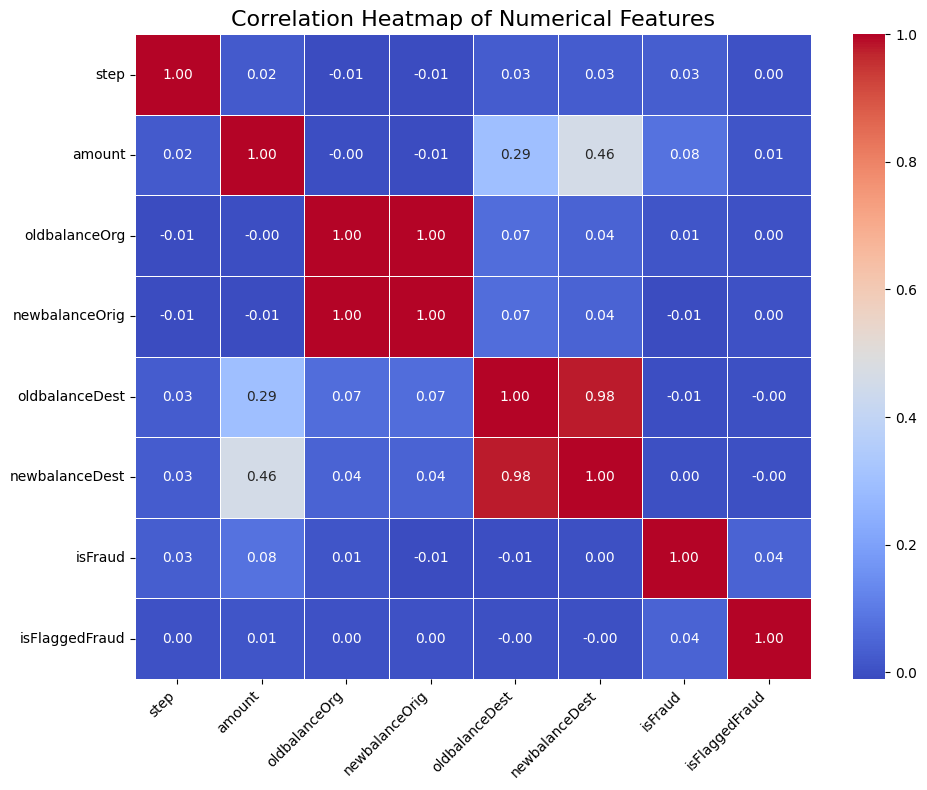

In [11]:


# Convert LazyFrame to DataFrame with only numerical columns
df = lf.select([
    col for col in lf.columns 
    if lf.schema[col] in [pl.Float32, pl.Float64, pl.Int32, pl.Int64]
]).collect()

# Calculate correlation matrix
corr_matrix = df.corr()

# # Set up the matplotlib figure
# plt.figure(figsize=(10, 8))

# # Draw the heatmap with seaborn
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Heatmap of Numerical Features')
# plt.tight_layout()
# plt.show()

# Since we already have df and corr_matrix, we can directly improve the heatmap visualization

# Get proper column names for the correlation matrix
column_names = corr_matrix.columns

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with seaborn with improved labels
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5,
    xticklabels=column_names,
    yticklabels=column_names
)

# Add clearer labels and title
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

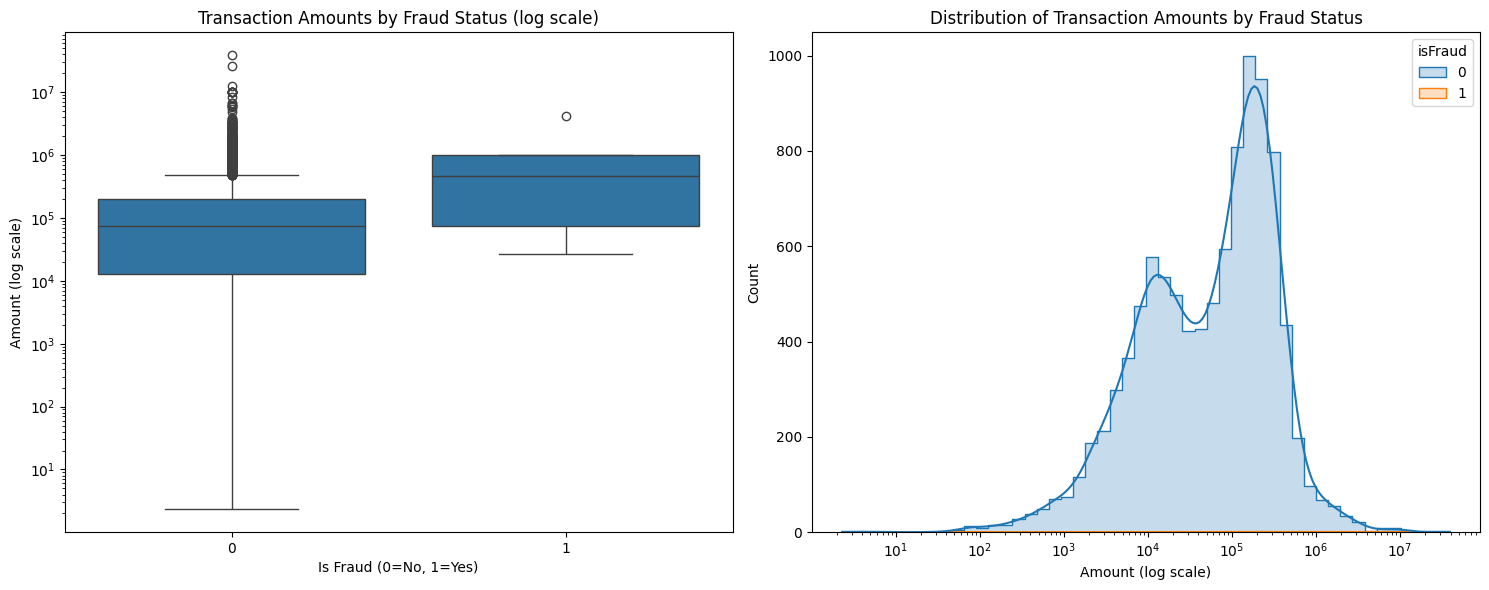

In [ ]:
#Randomly generated by AI

# Create a new dataframe with a sample for better visualization (otherwise too many points)
sample_size = 10000  # Adjust based on your needs
sampled_df = df.sample(n=sample_size, seed=42)

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Plot 1: Box plot of transaction amounts by fraud status
plt.subplot(1, 2, 1)
sns.boxplot(x='isFraud', y='amount', data=sampled_df)
plt.yscale('log')  # Log scale for better visibility
plt.title('Transaction Amounts by Fraud Status (log scale)')
plt.xlabel('Is Fraud (0=No, 1=Yes)')
plt.ylabel('Amount (log scale)')

# Plot 2: Distribution of transaction amounts by fraud status
plt.subplot(1, 2, 2)
sns.histplot(data=sampled_df, x='amount', hue='isFraud', 
             bins=50, kde=True, element='step', log_scale=True)
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Amount (log scale)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()